# A Movie Recommendation system

using association rules and apriori algorithm

In [101]:
!pip install mlxtend


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
Parameters = {
    'like_threshold': 4.0,
    'confidence_threshold': 0.7,
    'apriori_min': 0.05,
    'frequency_threshold': 0.1,
}

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import association_rules, apriori


# Pre-processing

In [104]:
# Load data, genres are separated by |
movies = pd.read_csv('Dataset/movies.csv', sep=',')
ratings = pd.read_csv('Dataset/ratings.csv', sep=',')

movies['genres'] = movies['genres'].str.split('|')

movies.head()

movies_genres = movies[['movieId', 'title', 'genres']].explode('genres')

movies_genres.head()



,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [105]:
# List of all the genres
genres = []
for i in movies_genres['genres']:
    genres.append(i)

genres = list(set(genres))
genres.remove('(no genres listed)')
genres.remove('IMAX')
genres

['Drama',
 'Documentary',
 'Thriller',
 'Western',
 'Animation',
 'Musical',
 'Horror',
 'Sci-Fi',
 'Crime',
 'Mystery',
 'Children',
 'War',
 'Fantasy',
 'Romance',
 'Action',
 'Adventure',
 'Comedy',
 'Film-Noir']

In [106]:


ratings['threshold'] = ratings['rating'] >= Parameters['like_threshold']

ratings.head()

usr_movie_thres = ratings[['userId', 'movieId', 'threshold']]
usr_movie_thres.head()

# Create a dataframe with userId x movieID with the threshold value as integer

usr_movie_thres = usr_movie_thres.pivot_table(index='userId', columns='movieId', values='threshold', aggfunc='sum', fill_value=0)

# # swap movieID with title from movies dataframe
# usr_movie_thres = usr_movie_thres.rename(columns=movies.set_index('movieId')['title'])

usr_movie_thres.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Applying Apriori algorithm

In [107]:
frequent_itemsets = apriori(usr_movie_thres, min_support=Parameters['apriori_min'], use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=Parameters['confidence_threshold'])

rules.sort_values(by='confidence', ascending=False, inplace=True)

rules

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
34521,"(4993, 260, 2571, 1270, 1210)",(1196),0.062593,0.281669,0.062593,1.0,3.550265,0.044963,inf,0.766296
23431,"(318, 1196, 1198, 527)",(260),0.059613,0.345753,0.059613,1.0,2.892241,0.039001,inf,0.695721
37019,"(1196, 1198, 7153, 1270, 1210)","(4993, 260)",0.053651,0.153502,0.053651,1.0,6.514563,0.045416,inf,0.894488
28118,"(608, 593, 296, 1210)",(1196),0.050671,0.281669,0.050671,1.0,3.550265,0.036398,inf,0.756672
21604,"(5952, 4993, 1196, 110)",(260),0.055142,0.345753,0.055142,1.0,2.892241,0.036076,inf,0.692429
...,...,...,...,...,...,...,...,...,...,...
28522,"(296, 593, 2858, 1198)",(1210),0.074516,0.241431,0.052161,0.7,2.899383,0.034171,2.528564,0.707844
21771,"(3578, 2571, 110)","(5952, 4993)",0.074516,0.187779,0.052161,0.7,3.727778,0.038168,2.707402,0.790660
31522,"(5952, 4993, 4226)","(7153, 2571)",0.074516,0.135618,0.052161,0.7,5.161538,0.042055,2.881272,0.871176
32491,"(858, 260, 1270)","(296, 1196, 1198)",0.074516,0.108793,0.052161,0.7,6.434247,0.044054,2.970691,0.912583


In [108]:

usr_movie = ratings[['userId', 'movieId']]

usr_movie = usr_movie.groupby('userId')['movieId'].apply(list).reset_index(name='movie_list')

usr_liked = ratings[['userId', 'movieId']].where(ratings['threshold'] == True)
usr_liked.dropna(inplace=True)
usr_liked['movieId'] = usr_liked['movieId'].astype(int)
usr_liked = usr_liked.groupby('userId')['movieId'].apply(list).reset_index(name='liked_list')
usr_liked['userId'] = usr_liked['userId'].astype(int)

# merge usr_movie and usr_liked
usr_movie = pd.merge(usr_movie, usr_liked, on='userId', how='left')
usr_movie

,userId,movie_list,liked_list
0,1,"[31, 1029, 1061, 1129, 1172, 1263, 1287, 1293,...","[1172, 1953, 2105]"
1,2,"[10, 17, 39, 47, 50, 52, 62, 110, 144, 150, 15...","[10, 17, 39, 47, 50, 110, 150, 153, 222, 253, ..."
2,3,"[60, 110, 247, 267, 296, 318, 355, 356, 377, 5...","[110, 296, 318, 356, 778, 1197, 1235, 1378, 17..."
3,4,"[10, 34, 112, 141, 153, 173, 185, 260, 289, 29...","[10, 34, 112, 141, 153, 260, 289, 296, 349, 35..."
4,5,"[3, 39, 104, 141, 150, 231, 277, 344, 356, 364...","[3, 39, 104, 141, 150, 277, 356, 364, 367, 377..."
...,...,...,...
666,667,"[6, 11, 16, 17, 21, 25, 32, 36, 41, 58, 82, 95...","[6, 32, 36, 41, 58, 110, 144, 150, 161, 232, 2..."
667,668,"[296, 318, 593, 608, 720, 1089, 1213, 1221, 12...","[296, 318, 593, 608, 1213, 1221, 1233, 1358, 2..."
668,669,"[223, 260, 381, 480, 785, 913, 968, 1135, 1210...","[223, 260, 785, 913, 968, 1304, 1953, 2395, 23..."
669,670,"[1, 25, 32, 34, 36, 47, 50, 110, 150, 318, 457...","[1, 25, 34, 36, 47, 50, 318, 457, 527, 593, 60..."


In [109]:
# Could be optimised

def get_recommended(usrID):
    liked = usr_movie['liked_list'][usrID-1]
    recommended = []
    for i, rule in enumerate(rules['antecedents']):
        if rule.issubset(liked):
            recommended.append(rules['consequents'][i])

    recommended = list(set([item for sublist in recommended for item in sublist]))
    recommended = [x for x in recommended if x not in liked]
    recommended = [x for x in recommended if x not in usr_movie['movie_list'][usrID-1]]
    recommended = [x for x in recommended if x in movies['movieId']]
    recommended = movies[movies['movieId'].isin(recommended)]
    recommended = recommended[['movieId', 'title', 'genres']]

    return list(recommended['movieId'])


# Learning from association rules

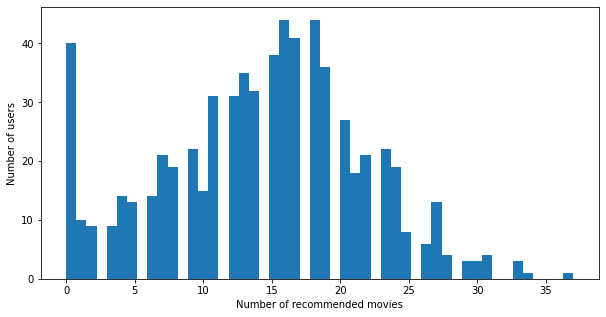

In [110]:
# df with recommended movies for each user
usr_movie['recommended'] = usr_movie['userId'].apply(get_recommended)

# sort by the number of recommended movies
usr_movie['recommended_count'] = usr_movie['recommended'].apply(len)

usr_movie.sort_values(by='recommended_count', ascending=False, inplace=True)

# histogram of the number of recommended movies
plt.figure(figsize=(10, 5))
plt.hist(usr_movie['recommended_count'], bins=50)
plt.xlabel('Number of recommended movies')
plt.ylabel('Number of users')
plt.show()


As we can see, by the amount of people getting none or  close to none recommendations, recommendation system working solely on movies that others recommended might not be sufficient enough.

The reasons for that might be as follows:
- A user watched a lot of movies. The system might recommend movies that were seen by the user.
- A user didn't rate enough movies, the rules might not find any association.
- A user is a unique user, the system might not find any similar users.
- **Rules are too specific.**


# Solving the problem

to solve the problem instead of focusing only on the movies, we'll generalise and try to recommend movies based on the genre and an average rating of the movie.

,userId,movie_list,liked_list,recommended,recommended_count
227,228,"[260, 370, 380, 480, 589, 1036, 1196, 1197, 11...","[260, 370, 480, 589, 1036, 1196, 1197, 1198, 1...","[1, 47, 50, 110, 150, 296, 318, 356, 364, 457,...",37
447,448,"[1, 260, 356, 480, 589, 593, 1196, 1198, 1210,...","[260, 480, 589, 593, 1196, 1198, 1210, 1270, 1...","[47, 50, 110, 296, 318, 457, 527, 588, 608, 85...",34
250,251,"[110, 260, 296, 356, 367, 551, 589, 1036, 1196...","[110, 260, 296, 356, 367, 551, 589, 1036, 1196...","[1, 47, 50, 150, 318, 364, 457, 480, 527, 588,...",33
233,234,"[260, 344, 356, 367, 480, 500, 541, 595, 661, ...","[260, 356, 500, 541, 745, 953, 1073, 1080, 109...","[1, 47, 50, 110, 150, 296, 318, 457, 527, 589,...",33
286,287,"[1, 2, 13, 260, 316, 329, 364, 480, 484, 494, ...","[1, 2, 13, 260, 316, 329, 364, 480, 494, 588, ...","[47, 50, 110, 296, 318, 356, 457, 527, 593, 60...",33
...,...,...,...,...,...
288,289,"[837, 1033, 1125, 1296, 1366, 1367, 1713, 1717...","[837, 1033, 1367, 2142, 2572, 2687, 3507, 3916...",[],0
300,301,"[107, 203, 262, 1429, 1835, 2088, 2132, 2136, ...","[203, 1835, 2132, 2857, 2995, 3156, 3545, 6495...",[],0
220,221,"[16, 112, 163, 172, 173, 315, 432, 466, 832, 1...",[1485],[],0
309,310,"[31, 246, 256, 628, 673, 785, 969, 1275, 1276,...","[256, 1285, 2278, 2407]",[],0


In [144]:
usr_genre = movies_genres.join(ratings.set_index('movieId'), on='movieId')

# drop rows with NA values
usr_genre.dropna(inplace=True)

# change UserID to int
usr_genre['userId'] = usr_genre['userId'].astype(int)
#drop unnecessary columns
usr_genre.drop(columns=['threshold'], inplace=True)
usr_genre.drop(columns=['timestamp'], inplace=True)

usr_genre = usr_genre.pivot_table(index='userId', columns='genres', values='rating', aggfunc='count', fill_value=0)
# divide cells by a sum of all cells in a row
usr_genre = usr_genre.div(usr_genre.sum(axis=1), axis=0)

# change to 1 if over frequency threshold else 0
freq_genre = usr_genre.copy()

usr_genre[usr_genre >= Parameters['frequency_threshold']] = 1
usr_genre[usr_genre < Parameters['frequency_threshold']] = 0

usr_genre = usr_genre.astype(int)

In [145]:
usr_genre.head(15)

genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [146]:
frequent_genres = apriori(usr_genre, min_support=Parameters['apriori_min'], use_colnames=True)

rules_genres = association_rules(frequent_genres, metric='confidence', min_threshold=Parameters['confidence_threshold'])

rules_genres.sort_values(by='confidence', ascending=False, inplace=True)

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [147]:
rules_genres

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,"(Thriller, Romance)",(Drama),0.056632,0.864382,0.055142,0.973684,1.126452,0.006190,5.153502,0.118996
8,(Romance),(Drama),0.202683,0.864382,0.195231,0.963235,1.114364,0.020036,3.688823,0.128715
31,"(Thriller, Drama, Adventure)",(Action),0.116244,0.533532,0.111773,0.961538,1.802213,0.049753,12.128167,0.503676
21,"(Romance, Comedy)",(Drama),0.184799,0.864382,0.177347,0.959677,1.110247,0.017611,3.363338,0.121810
14,"(Thriller, Adventure)",(Action),0.159463,0.533532,0.152012,0.953271,1.786717,0.066933,9.982414,0.523849
13,"(Adventure, Sci-Fi)",(Action),0.081967,0.533532,0.077496,0.945455,1.772067,0.033764,8.551913,0.474588
34,"(Thriller, Drama, Adventure, Comedy)",(Action),0.053651,0.533532,0.050671,0.944444,1.770174,0.022046,8.396423,0.459750
25,"(Thriller, Crime)",(Drama),0.078987,0.864382,0.074516,0.943396,1.091412,0.006241,2.395926,0.090939
6,(Crime),(Drama),0.101341,0.864382,0.095380,0.941176,1.088844,0.007782,2.305514,0.090796
29,"(Thriller, Adventure, Comedy)",(Action),0.083458,0.533532,0.077496,0.928571,1.740423,0.032969,6.530551,0.464165


In [148]:
# pick top 4 genres for each user
top_genres = freq_genre.apply(lambda x: x.sort_values(ascending=False).index[:4].tolist(), axis=1)
top_genres


userId
1      [Adventure, Drama, Thriller, Comedy]
2        [Drama, Comedy, Romance, Thriller]
3         [Drama, Comedy, Action, Thriller]
4        [Comedy, Adventure, Action, Drama]
5       [Comedy, Drama, Romance, Adventure]
                       ...                 
667      [Drama, Comedy, Romance, Thriller]
668        [Drama, Comedy, Crime, Thriller]
669       [Comedy, Thriller, Drama, Action]
670        [Drama, Thriller, Crime, Comedy]
671     [Drama, Comedy, Adventure, Romance]
Length: 671, dtype: object

In [117]:
def recommendGenre(usrID):
    genres = top_genres[usrID]
    recommended = []
    for i, rule in enumerate(rules_genres['antecedents']):
        if rule.issubset(genres):
            recommended.append(rules_genres['consequents'][i])

    recommended = list(set([item for sublist in recommended for item in sublist]))

    return recommended
        

In [153]:
usr_movie['recommended_genres'] = usr_movie['userId'].apply(recommendGenre)

# choosing the most popular-best rated 
the mean of the ratings is a bad indicator for the movies some of them have only one rating and it is 5.0 we need to take into account the number of ratings we will use the Bayesian average

In [162]:
# the mean of the ratings is a bad indicator for the movies
# some of them have only one rating and it is 5.0
# we need to take into account the number of ratings
# we will use the Bayesian average

def BayesianAverage(ratings):
    C = ratings.mean()
    m = ratings.count()
    v = ratings.var()
    R = ratings.mean()
    return (v/(v+m))*R + (m/(v+m))*C

In [165]:
topMovies_genre = movies_genres.join(ratings.set_index('movieId'), on='movieId')

# drop rows with NA values
topMovies_genre.dropna(inplace=True)
# apply BayesianAverage to ratings
topMovies_genre = topMovies_genre.groupby('movieId').agg({'title': 'first', 'genres': 'first', 'rating': BayesianAverage})


# sort by genres then rating 
topMovies_genre.sort_values(by=['genres', 'rating'], ascending=False, inplace=True)
topMovies_genre.dropna(inplace=True)

topMovies_genre

,title,genres,rating
movieId,,,
3037,Little Big Man (1970),Western,4.166667
128360,The Hateful Eight (2015),Western,4.062500
82459,True Grit (2010),Western,3.840909
3074,Jeremiah Johnson (1972),Western,3.833333
6617,Open Range (2003),Western,3.833333
...,...,...,...
61465,Bangkok Dangerous (2008),Action,0.500000
65802,Paul Blart: Mall Cop (2009),Action,0.500000
108689,"I, Frankenstein (2014)",Action,0.500000


In [156]:
def recommendMovieOnGenre(usrID, genres):
    recommended = []
    
    for genre in genres:
        suggested = 0
        considering = topMovies_genre.where(topMovies_genre['genres'] == genre).dropna()
        considering = considering['movieId'].astype(int)
        considering = considering.tolist()
        for movie in considering:
            if movie not in recommended and movie not in usr_movie['movie_list'][usrID-1]:
                recommended.append(movie)
                suggested += 1
            if suggested == 1:
                break
            

    return recommended

In [154]:
usr_movie

,userId,movie_list,liked_list,recommended,recommended_count,recommended_genres
227,228,"[260, 370, 380, 480, 589, 1036, 1196, 1197, 11...","[260, 370, 480, 589, 1036, 1196, 1197, 1198, 1...","[1, 47, 50, 110, 150, 296, 318, 356, 364, 457,...",37,"[Drama, Comedy]"
447,448,"[1, 260, 356, 480, 589, 593, 1196, 1198, 1210,...","[260, 480, 589, 593, 1196, 1198, 1210, 1270, 1...","[47, 50, 110, 296, 318, 457, 527, 588, 608, 85...",34,"[Action, Drama, Comedy]"
250,251,"[110, 260, 296, 356, 367, 551, 589, 1036, 1196...","[110, 260, 296, 356, 367, 551, 589, 1036, 1196...","[1, 47, 50, 150, 318, 364, 457, 480, 527, 588,...",33,"[Drama, Comedy]"
233,234,"[260, 344, 356, 367, 480, 500, 541, 595, 661, ...","[260, 356, 500, 541, 745, 953, 1073, 1080, 109...","[1, 47, 50, 110, 150, 296, 318, 457, 527, 589,...",33,"[Thriller, Drama, Comedy, Action]"
286,287,"[1, 2, 13, 260, 316, 329, 364, 480, 484, 494, ...","[1, 2, 13, 260, 316, 329, 364, 480, 494, 588, ...","[47, 50, 110, 296, 318, 356, 457, 527, 593, 60...",33,"[Drama, Comedy]"
...,...,...,...,...,...,...
288,289,"[837, 1033, 1125, 1296, 1366, 1367, 1713, 1717...","[837, 1033, 1367, 2142, 2572, 2687, 3507, 3916...",[],0,"[Thriller, Drama, Action]"
300,301,"[107, 203, 262, 1429, 1835, 2088, 2132, 2136, ...","[203, 1835, 2132, 2857, 2995, 3156, 3545, 6495...",[],0,"[Thriller, Action, Drama, Comedy]"
220,221,"[16, 112, 163, 172, 173, 315, 432, 466, 832, 1...",[1485],[],0,"[Drama, Comedy]"
309,310,"[31, 246, 256, 628, 673, 785, 969, 1275, 1276,...","[256, 1285, 2278, 2407]",[],0,"[Thriller, Drama, Comedy, Action]"


In [157]:
usr_movie['recommended'] += usr_movie.apply(lambda x: recommendMovieOnGenre(x['userId'], x['recommended_genres']), axis=1)

In [158]:
usr_movie['recommended_count'] = usr_movie['recommended'].apply(len)

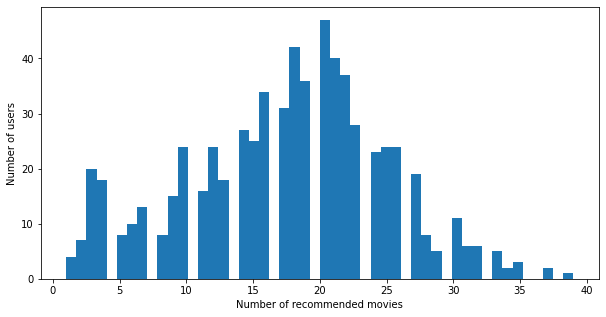

In [159]:
plt.figure(figsize=(10, 5))
plt.hist(usr_movie['recommended_count'], bins=50)
plt.xlabel('Number of recommended movies')
plt.ylabel('Number of users')
plt.show()
